In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
dataset= pd.read_csv("assets/data/slider_audio_dataset.csv", header= None)
dataset.head()

,0,1,2,3,4,5
0,-418.58140,86.146290,13.112919,3.235460,-4.658875,slider_abnormal
1,-430.18576,107.336136,12.131602,21.112997,6.187604,slider_abnormal
2,-419.58572,90.211050,22.299294,13.490429,5.257433,slider_abnormal
3,-437.38270,102.915184,19.436031,20.004710,3.328667,slider_abnormal
4,-407.44833,107.464960,7.370877,24.959505,1.243135,slider_abnormal


In [3]:
dataset.columns= ['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','class']

In [4]:
dataset['class'].value_counts()

slider_normal      3204
slider_abnormal     890
Name: class, dtype: int64

In [5]:
dataset_class = dataset['class']

In [6]:
data_matrics = dataset.drop('class', axis = 1)
data_matrics.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5
0,-418.58140,86.146290,13.112919,3.235460,-4.658875
1,-430.18576,107.336136,12.131602,21.112997,6.187604
2,-419.58572,90.211050,22.299294,13.490429,5.257433
3,-437.38270,102.915184,19.436031,20.004710,3.328667
4,-407.44833,107.464960,7.370877,24.959505,1.243135


### Normalizing Data matrics

In [7]:
data_matrics_normalized=(data_matrics-data_matrics.mean())/data_matrics.std()

### Kmean Clustering 

In [8]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(data_matrics_normalized)
cluster_labels = pd.Series(kmeans.labels_, name='cluster')

In [9]:
data_matrics_kmean = data_matrics_normalized.join(cluster_labels.to_frame())

In [10]:
cluster_labels.value_counts()

1    1992
2    1111
0     991
Name: cluster, dtype: int64

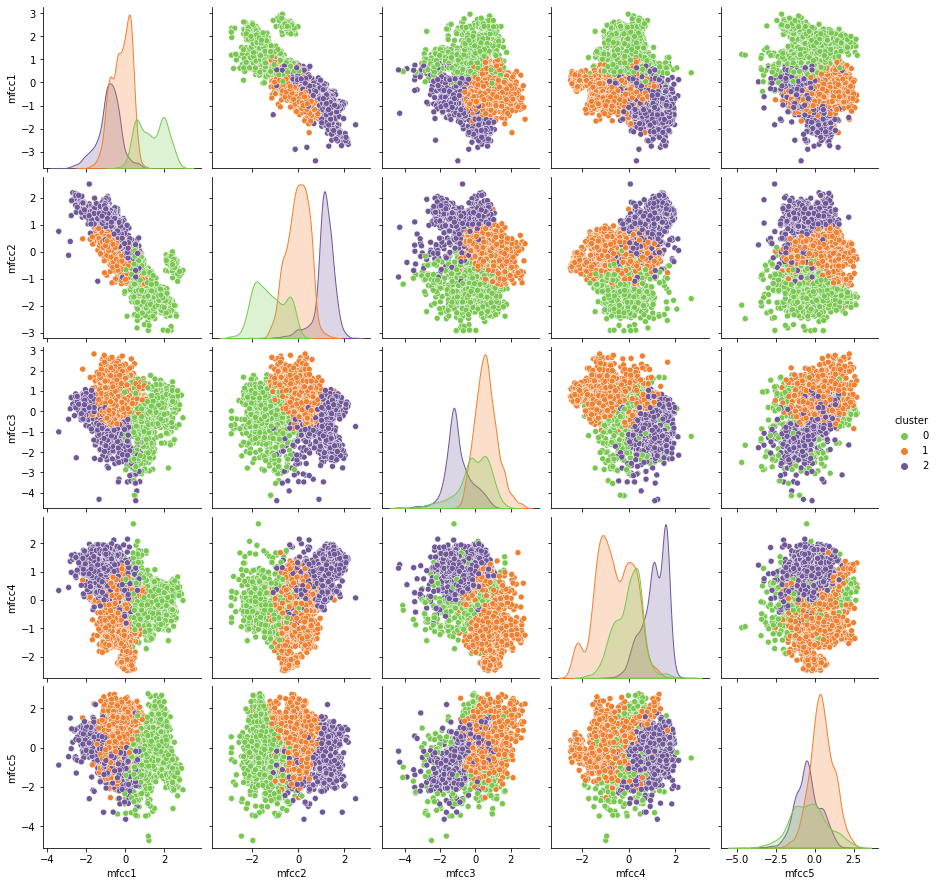

In [11]:
sns.pairplot(data_matrics_kmean, hue = 'cluster', palette=['#78C850', '#F08030','#705898'])

In [12]:
dataset_class = dataset['class']
dataset_class = np.where(dataset_class == 2, 'valve_normal', dataset_class)
dataset_class = np.where(dataset_class == 0, 'valve_abnormal', dataset_class)
metrics.rand_score(dataset_class, cluster_labels)

0.5489601737617014

### Spectral Clustering

In [13]:
from sklearn.cluster import SpectralClustering


In [14]:
SpecCluster= SpectralClustering(n_clusters=3, assign_labels='discretize')
SpecCluster.fit(data_matrics_normalized)
cluster_labels = pd.Series(SpecCluster.labels_, name='cluster')

In [15]:
cluster_labels.value_counts()

0    2451
1    1061
2     582
Name: cluster, dtype: int64

In [16]:
data_matrics_spec = data_matrics_normalized.join(cluster_labels.to_frame())

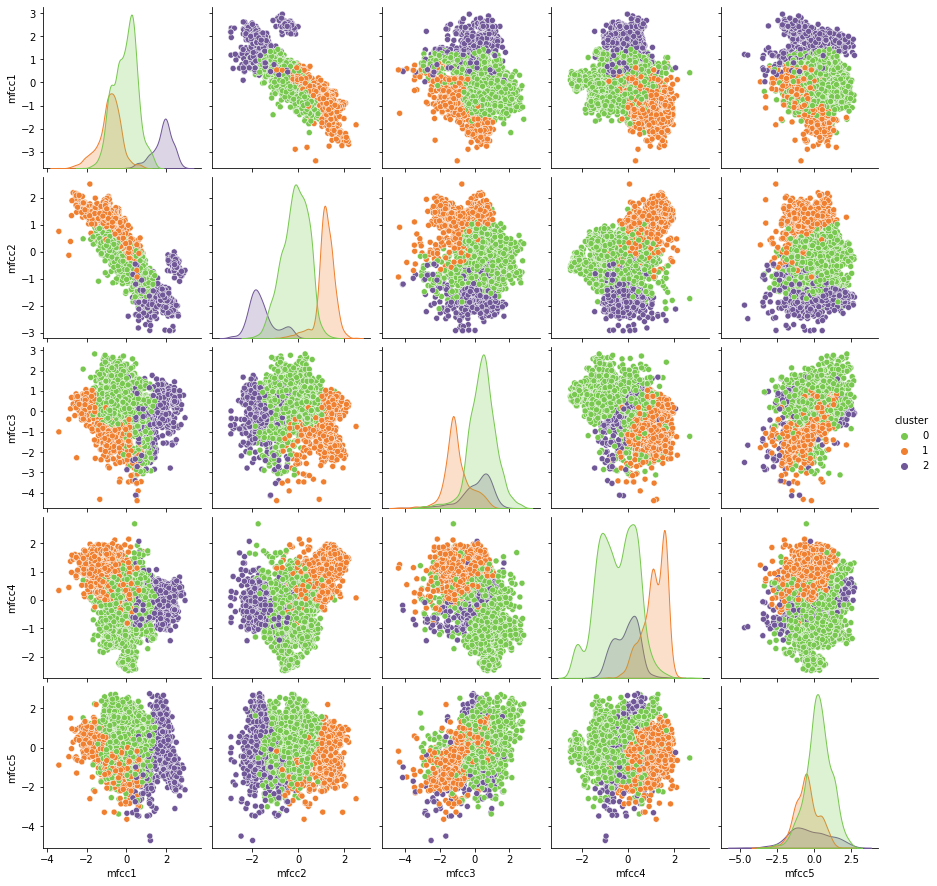

In [18]:
sns.pairplot(data_matrics_spec, hue = 'cluster', palette=['#78C850', '#F08030','#705898'])

In [27]:
dataset_class = dataset['class']
dataset_class = np.where(dataset_class == 1, 'valve_normal', dataset_class)
dataset_class = np.where(dataset_class == 2, 'valve_abnormal', dataset_class)
metrics.rand_score(dataset_class, cluster_labels)

0.42128428067938267

### Hierarchical clustering with Agglomerative Clustering Algorithem

In [20]:
from sklearn.cluster import AgglomerativeClustering

AggCluster= AgglomerativeClustering(n_clusters=3)
AggCluster.fit(data_matrics_normalized)
cluster_labels = pd.Series(AggCluster.labels_, name='cluster')
data_metrics_AggCluster = data_matrics_normalized.join(cluster_labels.to_frame())

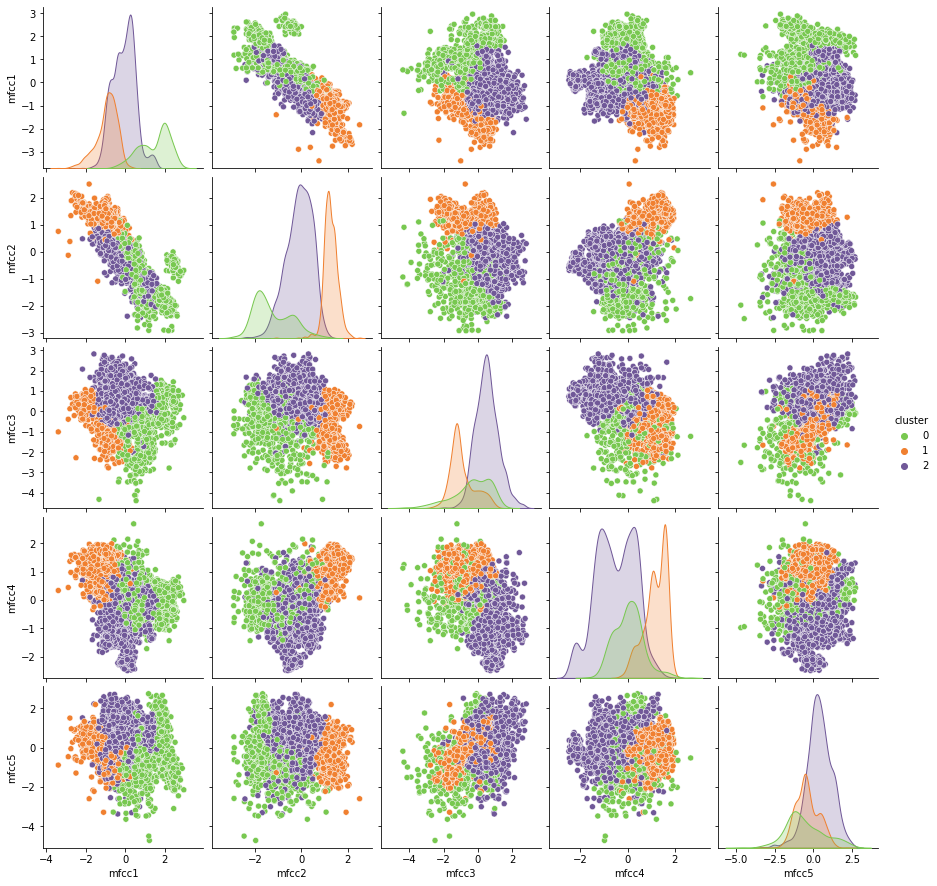

In [21]:
sns.pairplot(data_metrics_AggCluster, hue = 'cluster', palette=['#78C850', '#F08030','#705898'])

In [22]:
dataset_class = dataset['class']
dataset_class = np.where(dataset_class == 2, 'valve_normal', dataset_class)
dataset_class = np.where(dataset_class == 0, 'valve_abnormal', dataset_class)
metrics.rand_score(dataset_class, cluster_labels)

0.5545650819234431

### Different Clustering Algorithm comparision

<AxesSubplot:title={'center':'Agglomerative Clustering'}, xlabel='mfcc2', ylabel='mfcc5'>

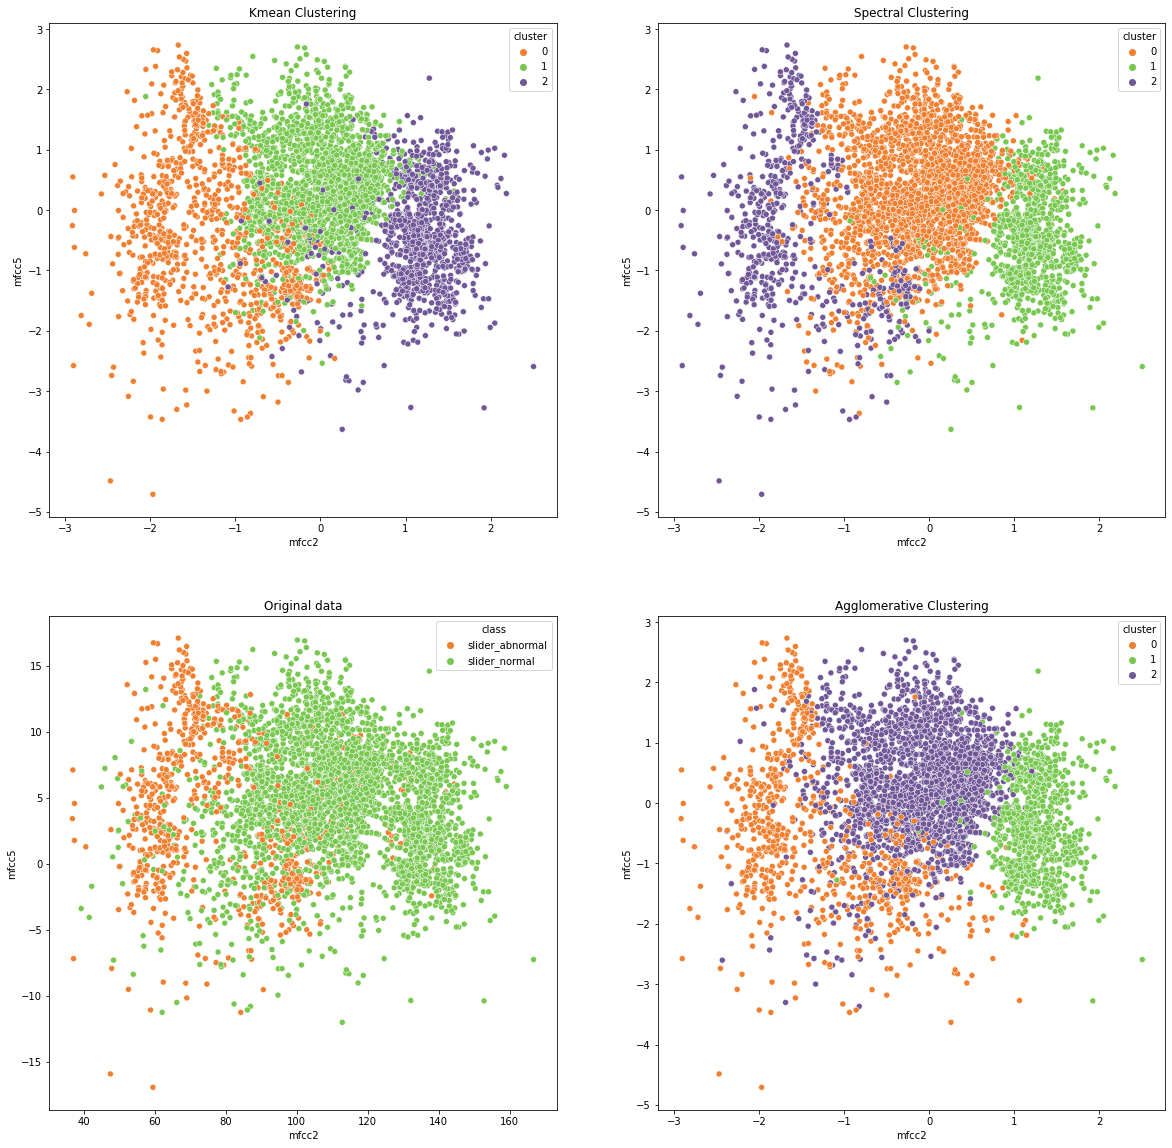

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes[0,0].title.set_text("Kmean Clustering")
axes[0,1].title.set_text("Spectral Clustering")
axes[1,0].title.set_text("Original data")
axes[1,1].title.set_text("Agglomerative Clustering")

sns.scatterplot(ax= axes[0,0], data=data_matrics_kmean, x="mfcc2", y="mfcc5",hue = 'cluster', palette=['#F08030', '#78C850','#705898'])
sns.scatterplot(ax= axes[0,1], data=data_matrics_spec, x="mfcc2", y="mfcc5",hue = 'cluster', palette=['#F08030', '#78C850','#705898'])
sns.scatterplot(ax= axes[1,0], data=dataset, x="mfcc2", y="mfcc5",hue = 'class', palette=['#F08030', '#78C850'])
sns.scatterplot(ax= axes[1,1], data=data_metrics_AggCluster, x="mfcc2", y="mfcc5",hue = 'cluster', palette=['#F08030', '#78C850','#705898'])

In [24]:
iner=[]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(data_matrics_normalized)
    iner.append(kmeans.inertia_)
    cluster_labels = pd.Series(kmeans.labels_, name='cluster')

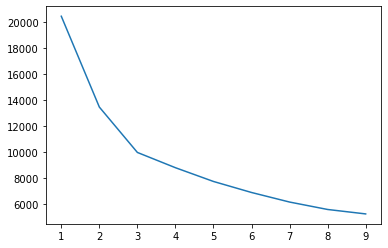

In [25]:
plt.plot(range(1,10), iner)
plt.show()